## 이미지 데이터 + 비지도학습 분류
---
 - 이미지 데이터 정보: 100*100 흑백이미지

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILE='../Data/fruits_300.npy'

In [3]:
fruits=np.load(FILE)
fruits.shape

(300, 100, 100)

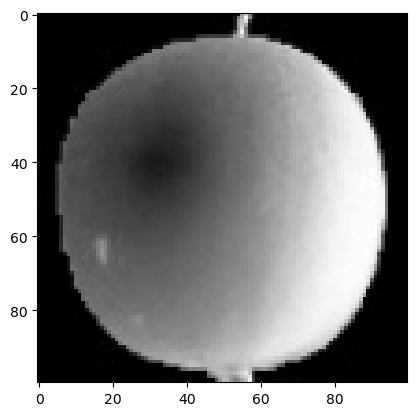

In [32]:
plt.imshow(fruits[0], cmap='gray')

In [10]:
fruit_2d=fruits.reshape(-1, fruits.shape[1]*fruits.shape[2])
fruit_2d.shape

(300, 10000)

In [33]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

inertia_list=[]
for i in range(1, 21):
    f_cluster=KMeans(n_clusters=i)
    f_cluster.fit(fruit_2d)
    inertia_list.append(f_cluster.inertia_)

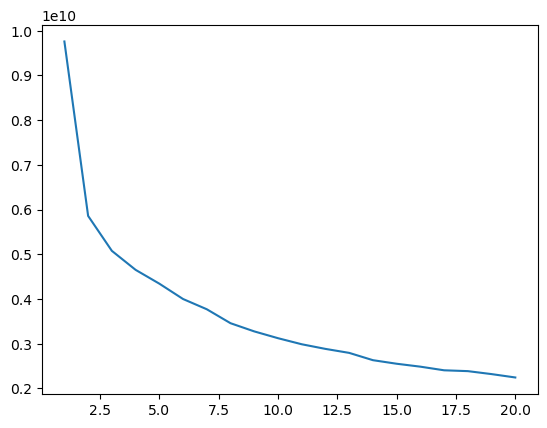

In [15]:
plt.plot(range(1,21), inertia_list)
# plt.scatter(range(1,151), inertia_list)
plt.show()

In [37]:
f_cluster=KMeans(20)
f_cluster.fit(fruit_2d)
f_trans=f_cluster.transform(fruit_2d)

In [38]:
f_trans.shape

(300, 20)

In [39]:
from sklearn.metrics import silhouette_score

# -1~1사이값, 1이 잘된것 최소 0.5는 넘어야...
silhouette_score(fruits.reshape(-1, 10000), f_cluster.labels_, metric='euclidean')

0.2610463527744392

In [41]:
from sklearn.linear_model import LogisticRegression
target=f_cluster.labels_.reshape(-1,1)
lrModel=LogisticRegression(random_state=11, max_iter=500)
lrModel.fit(fruits.reshape(-1,10000), f_cluster.labels_)

LogisticRegression(max_iter=500, random_state=11)

In [42]:
pre_label=lrModel.predict(fruits.reshape(-1,10000))

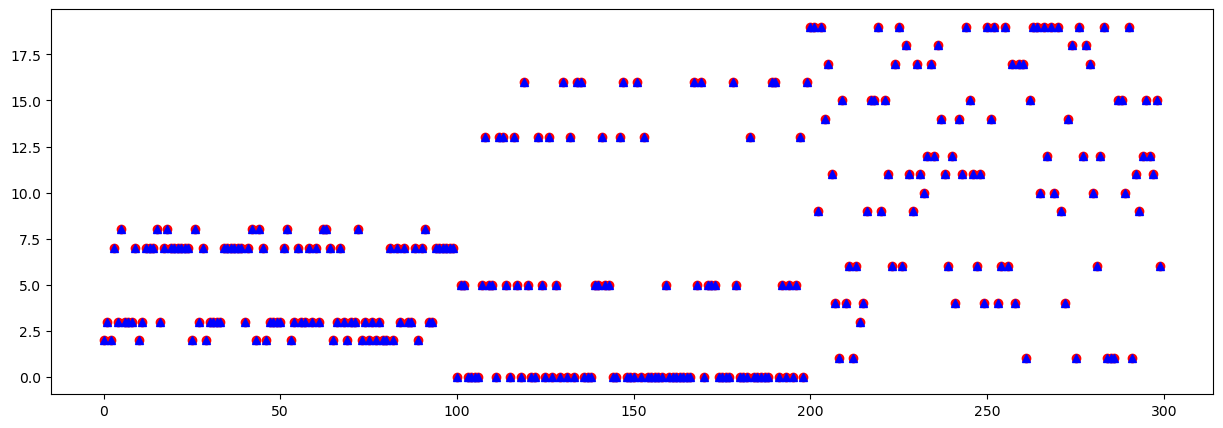

In [43]:
plt.figure(figsize=(15,5))
plt.plot(pre_label, 'ro')
plt.plot(f_cluster.labels_, 'b^')
#plt.axis([0,150,0,3])
plt.show()